In [2]:
pip install pyodbc pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyodbc
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

conn_str = (
    "DRIVER={ODBC Driver 18 for SQL Server};"
    "SERVER=iman;"
    "DATABASE=Video_games;"
    "Trusted_Connection=yes;"
    "TrustServerCertificate=yes;"  # Trust the server's SSL certificate

)

connection = pyodbc.connect(conn_str)

In [4]:
preview_query = "SELECT TOP 10 * FROM [dbo].[games]"
df_preview = pd.read_sql(preview_query, connection)
print(df_preview)


   GameID                           Title Platform  \
0       1       Deus Ex: Human Revolution      PS3   
1       2                  God of War III      PS3   
2       3  RESIDENT EVIL CODE: Veronica X      PS3   
3       5                 Castle Crashers      PS3   
4       6                   Demon's Souls      PS3   
5       7              FINAL FANTASY XIII      PS3   
6       8                     MEGA MAN 10      PS3   
7       9               SUPER STARDUST HD      PS3   
8      10         Bionic Commando Rearmed      PS3   
9      11                  Critter Crunch      PS3   

                          Developers                    Genres Release_Date  
0                     eidos montreal                   shooter   2011-08-23  
1                Santa Monica Studio              Hack & Slash   2010-03-16  
2               Capcom Entertainment           Survival Horror   2017-05-10  
3                       The Behemoth                       RPG   2010-08-31  
4  Bluepoint Ga

In [13]:
# Define the query string
query = """
SELECT
    g.genres, pl.Nickname, SUM(CAST(p.price AS DECIMAL(10,2))) AS Total_Price
FROM
    [dbo].[games] g
JOIN
    price p ON g.GameID = p.GameID
JOIN
    purchased_games pu ON g.GameID = pu.GameID
JOIN
    players pl ON pu.PlayerID = pl.PlayerID
GROUP BY
    g.Genres, pl.Nickname
ORDER BY
    SUM(CAST(p.price AS DECIMAL(10,2))) DESC
"""



In [14]:
df= pd.read_sql(query, connection)

In [15]:
df

,genres,Nickname,Total_Price
0,Visual Novel,Unsocial_Shadow,11720.63
1,Adventure,diabolvs_pl,11363.63
2,Adventure,BwhoUwannaB,9874.34
3,Adventure,fograid,9607.52
4,Adventure,Koenig_Arne,9482.68
...,...,...,...
2626193,Visual Novel,YoliZarote,0.98
2626194,Third Person Shooter,Yobyoni,0.98
2626195,"Puzzle, Platformer",yugioh_mortal,0.98
2626196,Card & Board,zerokingx,0.98


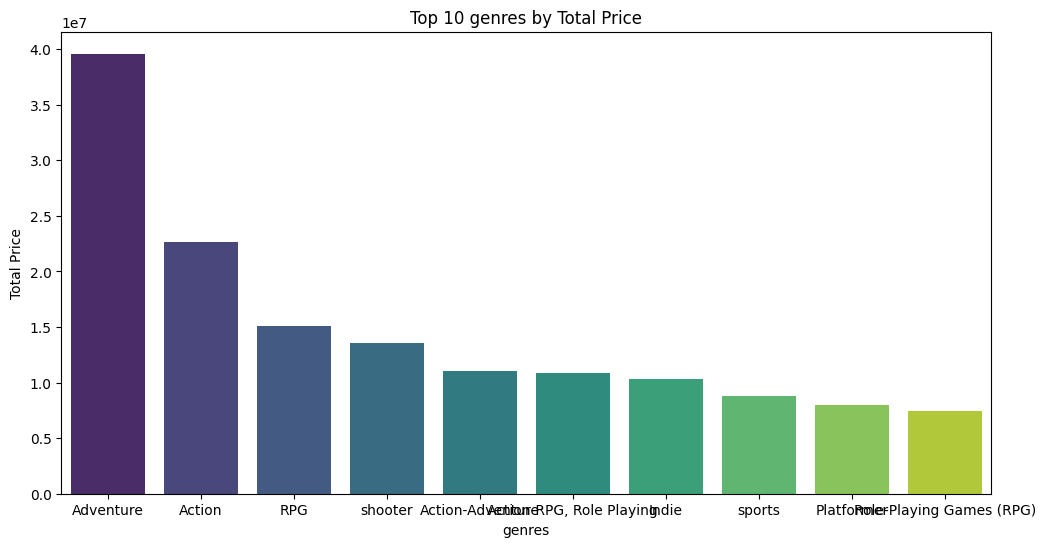

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

df_genre_price = df.groupby('genres', as_index=False)['Total_Price'].sum()
df_top_10 = df_genre_price.sort_values(by='Total_Price', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='genres', y='Total_Price', data=df_top_10, palette='viridis')
plt.title('Top 10 genres by Total Price')
plt.ylabel('Total Price')
plt.xlabel('genres')
plt.show()

Now, we can search for the possibility of existing a relationship
between genres and the price.
We run ANOVA test, if the p-value is less than 0.05, then there is a relationship and in contrast if the p-value is greater than 0.05, there is NO relationship.

In [18]:
from scipy.stats import f_oneway

genre_group = [df[df['genres'] == g]['Total_Price'] for g in df['genres'].unique()]
stat, p_value = f_oneway(*genre_group)

print("ANOVA test p-value: ", p_value)

ANOVA test p-value:  0.0
